In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

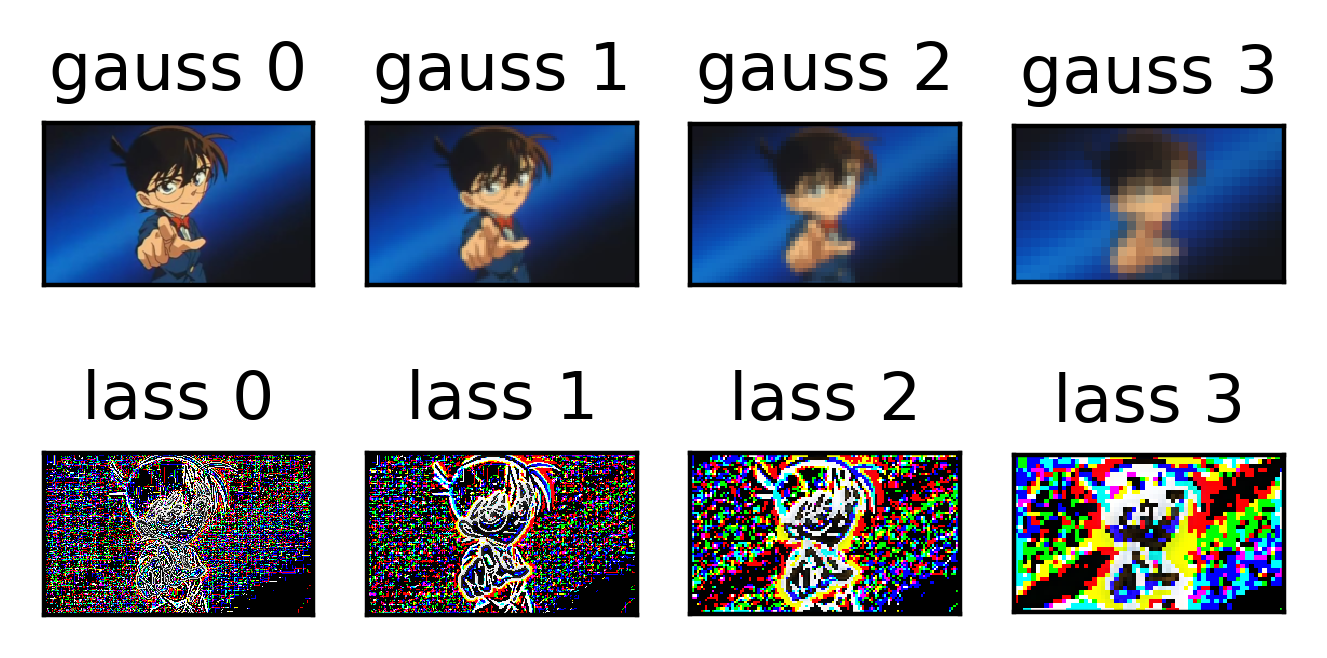

In [176]:
# 图像金字塔
img = cv2.imread('kenan.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
level = 4
plt.figure(figsize=(4,2),dpi=400)
for i in range(level):
    rows,cols = img.shape[:2]
    if rows % 2 == 1:
        img = img[:rows-1,:]
    if cols % 2 == 1:
        img = img[:,:cols-1]
    gauss = cv2.pyrDown(img)
    gaussUp = cv2.pyrUp(gauss)
    lass = img - gaussUp
    plt.subplot(2,level,i+1),plt.imshow(gauss),plt.xticks([]),plt.yticks([]),plt.title("gauss %d"%i)
    plt.subplot(2,level,i+1+level),plt.imshow(lass),plt.xticks([]),plt.yticks([]),plt.title('lass %d'%i)
    img = gauss
plt.show()
    
    

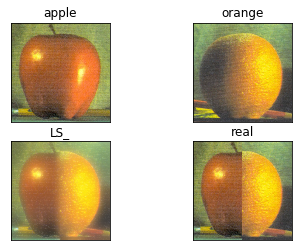

In [50]:
apple = cv2.imread('apple.jpg')
apple = cv2.cvtColor(apple,cv2.COLOR_BGR2RGB)
orange = cv2.imread('orange.jpg')
orange = cv2.cvtColor(orange,cv2.COLOR_BGR2RGB)
G = apple.copy()
apples = [G]
for i in range(6): # apples gaussian pyramid
    G = cv2.pyrDown(G)
    apples.append(G)
# print('apples lenth --> %d'%len(apples))
# for i in range(len(apples)):
#     print(apples[i].shape)
G = orange.copy()
oranges = [G]
for i in range(6): # oranges gaussian pyramid
    G = cv2.pyrDown(G)
    oranges.append(G)
laplasApple = [apples[5]] # apples[5]尺寸为 16x16
for i in range(5,0,-1): # laplass gaussian pyramid
    appUp = cv2.pyrUp(apples[i])
    lappla = cv2.subtract(apples[i-1],appUp) # 拉普拉斯金字塔 apples前一张图减去后一张图pyrUp
    laplasApple.append(lappla)
laplasOrange = [oranges[5]] #尺寸16x16
for i in range(5,0,-1): # laplass gaussian pyramid
    oraUp = cv2.pyrUp(oranges[i])
    lappla = cv2.subtract(oranges[i-1],oraUp)
    laplasOrange.append(lappla)
LS = []
for la,lb in zip(laplasApple,laplasOrange):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2],lb[:,cols//2:])) #拼接苹果左半边和橘子右半边
#     print('ls.shape-->',ls.shape)
    LS.append(ls)
LS_ = LS[0]
for i in range(1,6):
    LS_ = cv2.pyrUp(LS_)
#     print('LS_ shape ' ,LS_.shape,'LS[%d]'%i,LS[i].shape)
    LS_ = cv2.add(LS_,LS[i])
real = np.hstack((apple[:,0:cols//2],orange[:,cols//2:]))
plt.subplot(221),plt.imshow(apple),plt.title('apple'),plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(orange),plt.title('orange'),plt.xticks([]),plt.yticks([])
plt.subplot(223),plt.imshow(LS_),plt.title('LS_'),plt.xticks([]),plt.yticks([])
plt.subplot(224),plt.imshow(real),plt.title('real'),plt.xticks([]),plt.yticks([])
plt.show()

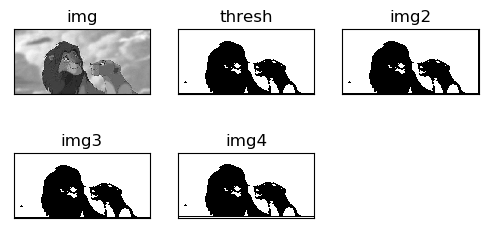

In [83]:
# 轮廓
img = cv2.imread('lion.jpg',0)
ret ,thresh = cv2.threshold(img,120,255,0)
img2,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓 -1 轮廓索引表示所有轮廓，(0,255,0)轮廓颜色   3表示轮廓厚度
img3 = cv2.drawContours(img2,contours,-1,(0,255,0),3) 
img4 = cv2.drawContours(img3,contours,3,(0,255,0),3)
plt.figure(figsize=(6,3),dpi=100)
plt.subplot(231),plt.imshow(img,'gray'),plt.title('img'),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(thresh,cmap='gray'),plt.title('thresh'),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(img2,cmap='gray'),plt.title('img2'),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(img3,cmap='gray'),plt.title('img3'),plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(img4,cmap='gray'),plt.title('img4'),plt.xticks([]),plt.yticks([])
plt.show()

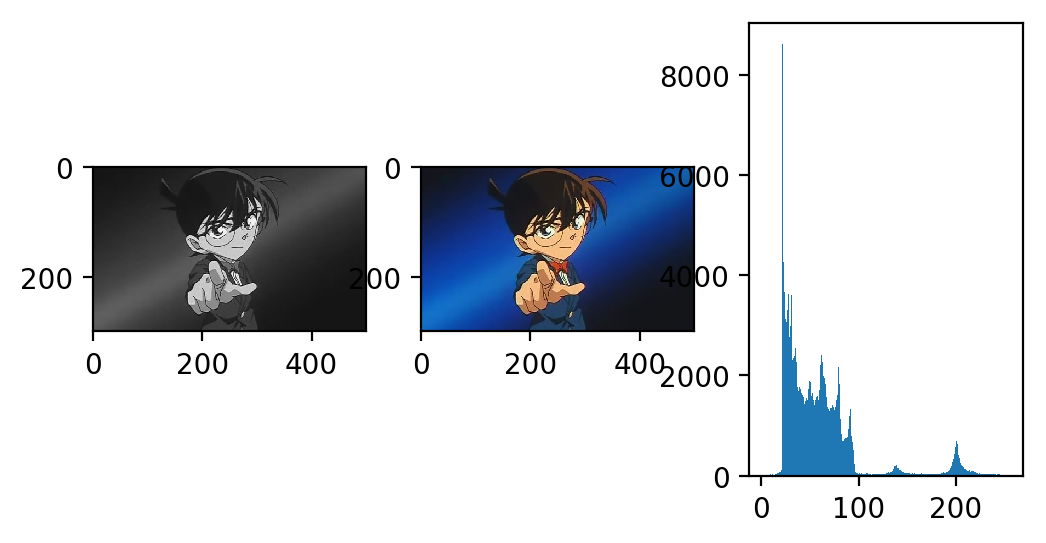

In [2]:
img = cv2.imread('kenan.jpg',0)
img2 = cv2.imread('kenan.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,3),dpi=200)
plt.subplot(131),plt.imshow(img,'gray')
plt.subplot(132),plt.imshow(img2,'gray')
plt.subplot(133),plt.hist(img.ravel(),bins=256,range=[0,256])
plt.show()

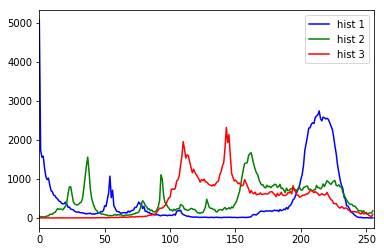

In [102]:
img = cv2.imread('lion.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col,label='hist %d'%(i+1))
plt.legend()
plt.xlim([0,256])
plt.show()

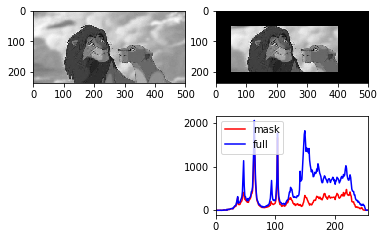

In [114]:
img = cv2.imread("lion.jpg",0)
mask = np.zeros(img.shape[:2],np.uint8)
mask[50:200,50:400] = 255
masked_img = cv2.bitwise_and(img,img,mask=mask)
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.imshow(masked_img,'gray')
# plt.subplot(223),plt.imshow(),plt.xlim([0,256])
plt.subplot(224),plt.plot(hist_mask,'r',label='mask'),plt.plot(hist_full,'b',label='full'),plt.xlim([0,256])
plt.legend()
plt.show()

In [167]:
a = np.array(range(256)) + 2
b = np.array(range(20)).reshape(2,2,5)
print('a-->',a)
print('b-->',b)
print('c-->',a[b])

a--> [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 2

cdf--> (256,)
<class 'numpy.ndarray'>
cdf.shape--> (256,)
imgg.shape--> (300, 500, 3)
<class 'numpy.ndarray'>


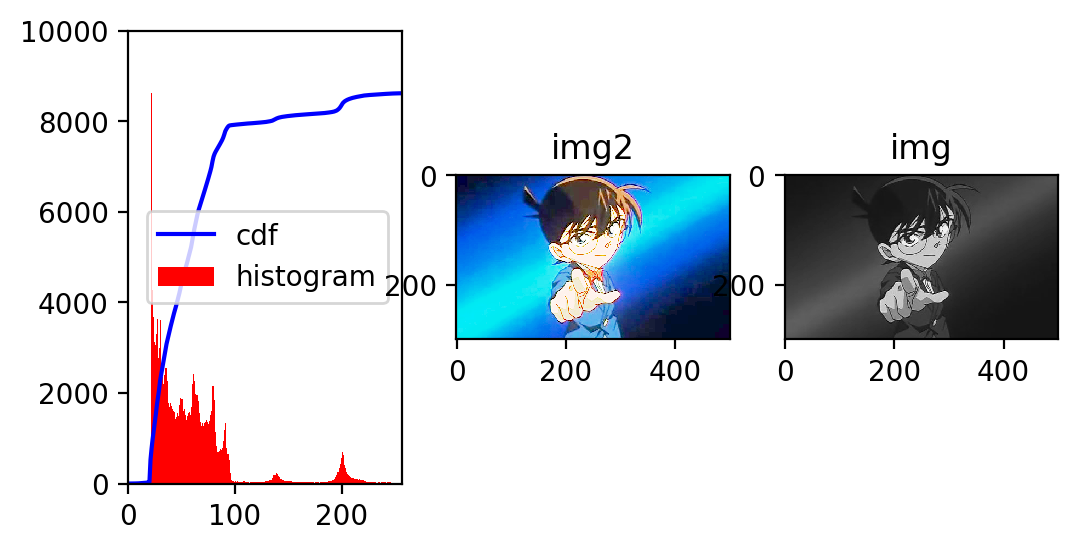

In [161]:
# 直方图均衡化  如果图像所有像素都比较高，亮度很亮，对比度会比较低 需要进行均衡化提高对比度
img = cv2.imread('kenan.jpg',0)
imgg = cv2.imread('kenan.jpg')
imgg = cv2.cvtColor(imgg,cv2.COLOR_BGR2RGB)
hist,bins = np.histogram(img.flatten(),256,[0,256])
# print('hist---->',hist)
# print('bins---->',bins)
# 计算累计分布
cdf = hist.cumsum()
# print('cdf---->',cdf)
print('cdf-->',cdf.shape)
print(type(cdf))
cdf_normalized = cdf * hist.max()/cdf.max()
plt.figure(figsize=(6,3),dpi=200)
plt.subplot(131),plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.ylim([0,10000])
plt.legend(('cdf','histogram'))

plt.subplot(132)
cdf_m = np.ma.masked_equal(cdf,0) #数组元素为零时掩盖(计算被忽略)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')# 对被掩盖的元素赋值，这里赋值0
print('cdf.shape-->',cdf.shape)
print('imgg.shape-->',imgg.shape)
print(type(cdf))
img2 = cdf[imgg] # 此处imgg是索引下标
plt.imshow(img2,'gray'),plt.title('img2')

plt.subplot(133)
plt.imshow(img,'gray'),plt.title('img')
plt.show()

(<matplotlib.image.AxesImage at 0x1d6fe66a668>, Text(0.5,1,'res'))

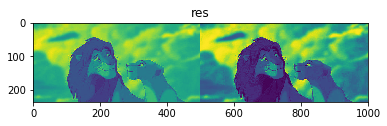

In [11]:
# 直方图均衡化（直方图只分布在一小块区域）
img = cv2.imread('lion.jpg',0)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) # stacking image 
plt.imshow(res),plt.title('res')

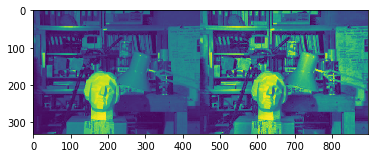

In [16]:
# 自适应直方图均衡化，将图像分成小块（直方图均衡，个别区域特别大,此处头像特别亮）
img = cv2.imread('head.jpg',0)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
cl1 = clahe.apply(img)
img = np.hstack((img,cl1))
plt.imshow(img)
plt.show()

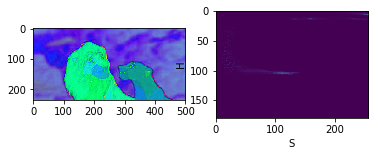

In [18]:
# 2D直方图 不同于一维直方图只考虑灰度值，二维直方图考虑颜色Hue和饱和度Saturation
img = cv2.imread('lion.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# channels [0,1]对应H,S  bins=[180,256] H为180 S为256
hist = cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])
plt.subplot(121),plt.imshow(hsv)
plt.subplot(122)
plt.imshow(hist,interpolation='nearest')
plt.xlabel('S')
plt.ylabel('H')
plt.show()

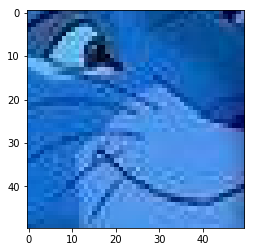

In [19]:
# 直方图反向投影
roi = cv2.imread('lion.jpg')[100:150,180:230,:]
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
target = cv2.imread('lion.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# 计算直方图
roihist = cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256],1)


plt.imshow(roi)
plt.show()